## Making figure A1

start by importing modules, data and priors

In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

In [2]:
cdf_file = "../data/RUNS/peak_run_no_delta_middle_z_until_0dot08.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [3]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "log_high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "high_mu": dist.Uniform(15, 60),
    "width_mu": dist.Uniform(-1,1),
    "middle_z_mu": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "high_sig": dist.Uniform(1.5,15),
    "width_sig": dist.Uniform(-1,1),
    "middle_z_sig": dist.Uniform(0,0.8),
}

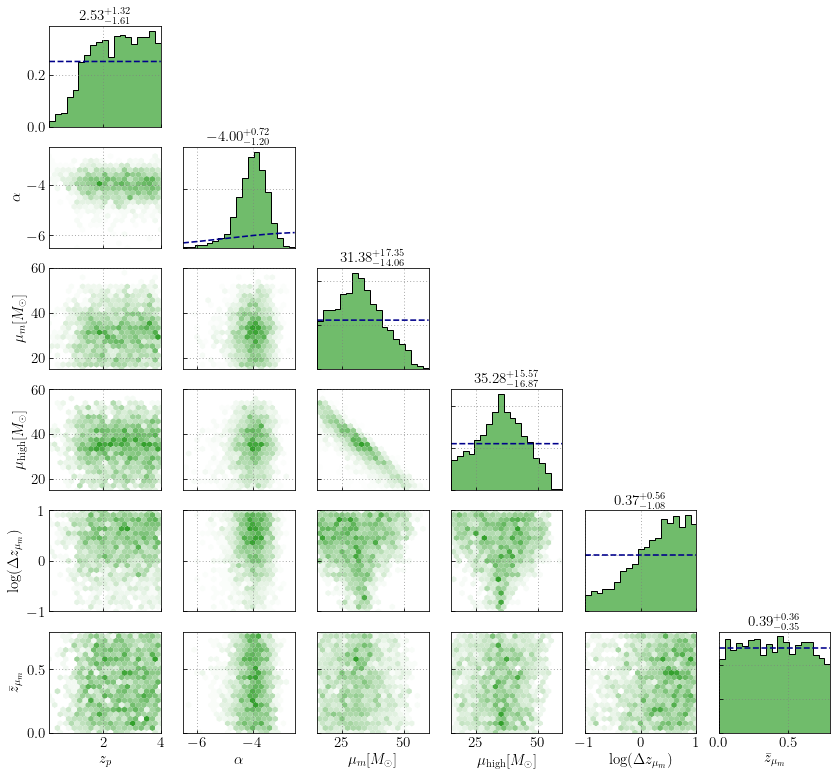

In [4]:
fig = plt.figure(figsize=(14,13))
toPlot_no_GWB_mu = {
    "zp":{"data":samps.zp,"plot_bounds":(0.1,4),"label":r"$z_p$"},
    "alpha_ref":{"data":samps.alpha_ref,"plot_bounds":(-6.5,-2.5),"label":r"$\alpha$"},
    "mu_m1":{"data":samps.mu_m1,"plot_bounds":(15, 60),"label":r"$\mu_{m} [M_\odot]$"},
    "high_mu":{"data":samps.high_mu,"plot_bounds":(15, 60),"label":r"$\mu_{\rm high} [M_\odot]$"},
    "width_mu":{"data":samps.log_width_mu,"plot_bounds":(-1,1),"label":r"log($\Delta z_{\mu_{m}}$)"},
    "middle_z_mu":{"data":samps.middle_z_mu,"plot_bounds":(0,0.8),"label":r"$\bar z_{\mu_{m}}$"},
}
plot_corner(fig, toPlot_no_GWB_mu, "#33a02c", labelsize=15, priors = new_priors)
plt.savefig("PE_mu_peak.pdf", dpi=600, bbox_inches='tight')
plt.show()